## Importing Libraries


Libraries

In [56]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

## Movie Budget

Production Budget is the budget set by a corporation for the number of units of a product that will be required and produced.

Domestice Gross the total monetary or market value of all the finished goods and services produced within North America (U.S., Canada, and Puerto Rico). 
i.e. gross box-office revenue in North America.

Worldwide Gross is the total monetary or market value of all the finished goods and services produced
i.e. gross box-office revenue from the world.

In [2]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
movie_budgets[movie_budgets.isnull().any(axis=1)]
## There are no missing values

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [4]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [5]:
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [6]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Clean up punctuation for numeric values

In [7]:
for col in movie_budgets.columns:
    # Check if the column contains dollar signs
    if movie_budgets[col].dtype == 'object' and '$' in movie_budgets[col].iloc[0]:
        # Replace the dollar signs with an empty string
        movie_budgets[col] = movie_budgets[col].str.replace('$', '')
print(movie_budgets)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0          425,000,000    760,507,625   2,776,345,279  
1          410,600,000    241,063,8

In [8]:
for col in movie_budgets.columns:
    # Check if the column contains punctuation
    if movie_budgets[col].dtype == 'object' and ',' in movie_budgets[col].iloc[0]:
        # Replace it with an empty string
        movie_budgets[col] = movie_budgets[col].str.replace('[^\w\s]','')
print(movie_budgets) 

      id release_date                                        movie  \
0      1  Dec 18 2009                                       Avatar   
1      2  May 20 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7 2019                                 Dark Phoenix   
3      4   May 1 2015                      Avengers: Age of Ultron   
4      5  Dec 15 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78  Dec 31 2018                                       Red 11   
5778  79   Apr 2 1999                                    Following   
5779  80  Jul 13 2005                Return to the Land of Wonders   
5780  81  Sep 29 2015                         A Plague So Pleasant   
5781  82   Aug 5 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0            425000000      760507625      2776345279  
1            410600000      241063875      1045

In [9]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec 31 2018,Red 11,7000,0,0
5778,79,Apr 2 1999,Following,6000,48482,240495
5779,80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep 29 2015,A Plague So Pleasant,1400,0,0


In [10]:
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'])
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'])

In [11]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

Analysis

In [12]:
movie_budgets["production_budget"].describe() 

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [13]:
movie_budgets["domestic_gross"].describe()

count    5.782000e+03
mean     4.187333e+07
std      6.824060e+07
min      0.000000e+00
25%      1.429534e+06
50%      1.722594e+07
75%      5.234866e+07
max      9.366622e+08
Name: domestic_gross, dtype: float64

In [14]:
movie_budgets["worldwide_gross"].describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [15]:
print(type(movie_budgets), type(movie_budgets["production_budget"]), type(movie_budgets["domestic_gross"]), type(movie_budgets["worldwide_gross"]))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [76]:
top_dom = movie_budgets.sort_values(by="domestic_gross", ascending=False).head()
top_dom

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
41,42,Feb 16 2018,Black Panther,200000000,700059566,1348258224
6,7,Apr 27 2018,Avengers: Infinity War,300000000,678815482,2048134200
42,43,Dec 19 1997,Titanic,200000000,659363944,2208208395


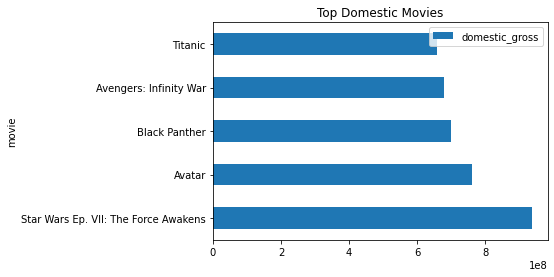

In [80]:
# plot top Domestic Gross Performers
top_dom.plot.barh(x = "movie", y = "domestic_gross", title= "Top Domestic Movies");
#plt.xticks(topdom.domestic_gross, topdom.movie, rotation=30);

<ipython-input-85-b26e4d9d1a59>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 30)


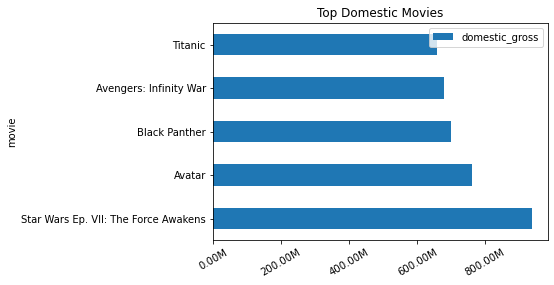

In [85]:
# plot top Domestic Gross Performers
ax = top_dom.plot.barh(x = "movie", y = "domestic_gross", title= "Top Domestic Movies");
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels, rotation = 30)
plt.show()
#plt.xticks(topdom.domestic_gross, topdom.movie, rotation=30);

In [77]:
top_world = movie_budgets.sort_values(by="worldwide_gross", ascending=False).head()
top_world

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
42,43,Dec 19 1997,Titanic,200000000,659363944,2208208395
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,Apr 27 2018,Avengers: Infinity War,300000000,678815482,2048134200
33,34,Jun 12 2015,Jurassic World,215000000,652270625,1648854864


<ipython-input-86-678a0e118a38>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 30)


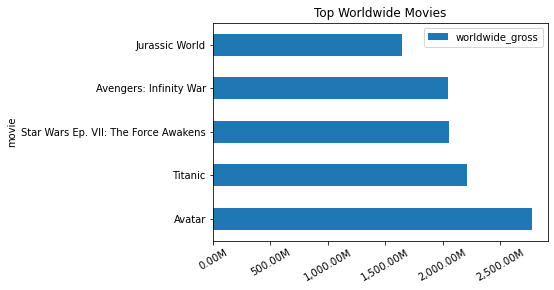

In [86]:
# plot top Worldwide Gross Performers
ax = top_world.plot.barh(x = "movie", y = "worldwide_gross", title= "Top Worldwide Movies");
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels, rotation = 30)
plt.show()

## TMDB

In [16]:
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [18]:
tmdb.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [19]:
len(tmdb)

26517

In [20]:
type(tmdb)

pandas.core.frame.DataFrame

In [21]:
tmdb.dtypes, tmdb.describe()

(Unnamed: 0             int64
 genre_ids             object
 id                     int64
 original_language     object
 original_title        object
 popularity           float64
 release_date          object
 title                 object
 vote_average         float64
 vote_count             int64
 dtype: object,
         Unnamed: 0             id    popularity  vote_average    vote_count
 count  26517.00000   26517.000000  26517.000000  26517.000000  26517.000000
 mean   13258.00000  295050.153260      3.130912      5.991281    194.224837
 std     7654.94288  153661.615648      4.355229      1.852946    960.961095
 min        0.00000      27.000000      0.600000      0.000000      1.000000
 25%     6629.00000  157851.000000      0.600000      5.000000      2.000000
 50%    13258.00000  309581.000000      1.374000      6.000000      5.000000
 75%    19887.00000  419542.000000      3.694000      7.000000     28.000000
 max    26516.00000  608444.000000     80.773000     10.000000  2218

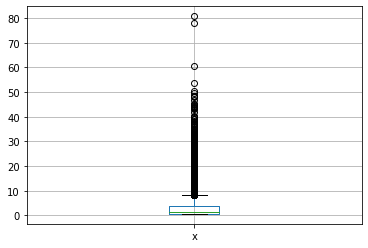

In [22]:
pd.DataFrame.boxplot(tmdb["popularity"]);


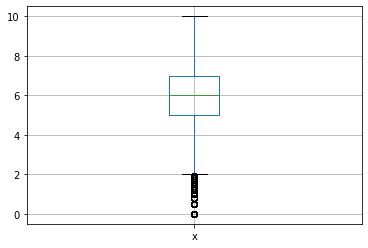

In [23]:
pd.DataFrame.boxplot(tmdb["vote_average"]);


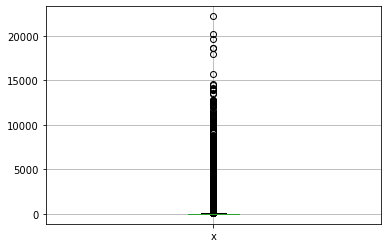

In [24]:
pd.DataFrame.boxplot(tmdb["vote_count"]);


## Movie Info

In [25]:
mov_inf = pd.read_csv('rt.movie_info.tsv', sep = '\t')
mov_inf

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [26]:
mov_inf.dtypes, mov_inf.describe()

(id               int64
 synopsis        object
 rating          object
 genre           object
 director        object
 writer          object
 theater_date    object
 dvd_date        object
 currency        object
 box_office      object
 runtime         object
 studio          object
 dtype: object,
                 id
 count  1560.000000
 mean   1007.303846
 std     579.164527
 min       1.000000
 25%     504.750000
 50%    1007.500000
 75%    1503.250000
 max    2000.000000)

In [27]:
mov_inf.isna().sum()
## many NA values

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Clean NAN values

In [28]:
#pd.DataFrame.fillna(value=0)
mov_inf.fillna(value=0)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",0,0,104 minutes,0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",0,0,116 minutes,0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",0,0,128 minutes,0
4,7,0,NR,Drama|Romance,Rodney Bennett,Giles Cooper,0,0,0,0,200 minutes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,0,0,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",0,0,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,0,"Jan 1, 1962","May 11, 2004",0,0,111 minutes,0
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",0,0,101 minutes,0


In [29]:
mov_inf.rating.unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [30]:
mov_inf.rating.count()

1557